In [10]:
import numpy as np 
import pandas as pd 
import scipy as si
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

train = pd.read_csv('./train.csv')
train.shape

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(200000, 202)

In [2]:
test = pd.read_csv('./test.csv')
test.shape

(200000, 201)

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [11]:
x=train.drop(['ID_code', 'target'], axis=1)
y=train[['target']]
x = x.astype(np.float32).values
y = y.astype(np.float32).values

In [14]:
# Import Keras packages
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
# data split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
seed = 1234
np.random.seed(seed)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.33)

In [17]:
x.shape[:]

(200000, 200)

In [18]:
y.shape[:]

(200000, 1)

In [19]:
x_train.shape[:]

(66000, 200)

In [20]:
x_test.shape[:]

(134000, 200)

In [22]:
y_train.shape[:]

(66000, 1)

In [23]:
y_test.shape[:]

(134000, 1)

In [28]:
from keras import regularizers
weight_decay = 0.01

# Define Model
model = Sequential()

#input layer
#model.add(Dense(8, input_dim=(8), kernel_initializer='he_normal', activity_regularizer=regularizers.l1(weight_decay)))
model.add(Dense(200, input_dim=(200), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(0.2))

# hidden layers1
model.add(Dense(8, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

# hidden layers2
model.add(Dense(200, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

# hidden layers4
model.add(Dense(200, input_dim=(200), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(0.3))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [29]:
#Complie
from keras import optimizers

optimizer = optimizers.Adam(amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
# Learning
from keras.callbacks import EarlyStopping, ModelCheckpoint

#callback_es = EarlyStopping(monitor='val_acc', patience=10, mode='auto', verbose=1)
callback_es = EarlyStopping(monitor='val_acc', patience=5, mode='auto', verbose=1)
callback_op = ModelCheckpoint(filepath='weights.{epoch:02d}.hdf5')

#model.fit(x, y, nb_epoch=1000, batch_size=100, callbacks=[callback_es, callback_op])
history = model.fit(x, y, nb_epoch=100, batch_size=100, validation_split=0.5, verbose=1, callbacks=[callback_es])
#history = model.fit(x, y, nb_epoch=1000, batch_size=50, verbose=1, callbacks=[callback_es])

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 100000 samples, validate on 100000 samples
Epoch 1/100
100000/100000 [==============================] - 11s 112us/step - loss: 0.2964 - acc: 0.8984 - val_loss: 0.2626 - val_acc: 0.9022
Epoch 2/100
100000/100000 [==============================] - 10s 100us/step - loss: 0.2549 - acc: 0.9067 - val_loss: 0.2802 - val_acc: 0.9006
Epoch 3/100
100000/100000 [==============================] - 10s 102us/step - loss: 0.2456 - acc: 0.9082 - val_loss: 0.2495 - val_acc: 0.9043
Epoch 4/100
100000/100000 [==============================] - 11s 107us/step - loss: 0.2370 - acc: 0.9100 - val_loss: 0.2723 - val_acc: 0.9009
Epoch 5/100
100000/100000 [==============================] - 11s 114us/step - loss: 0.2298 - acc: 0.9104 - val_loss: 0.2552 - val_acc: 0.9033
Epoch 6/100
100000/100000 [==============================] - 11s 114us/step - loss: 0.2234 - acc: 0.9117 - val_loss: 0.2448 - val_acc: 0.9078
Epoch 7/100
100000/100000 [==============================] - 12s 117us/step - loss: 0.2172 - acc

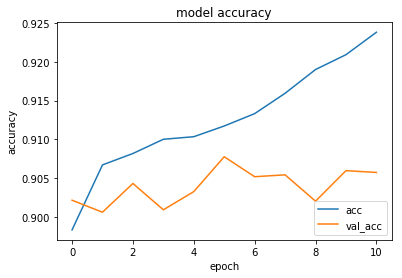

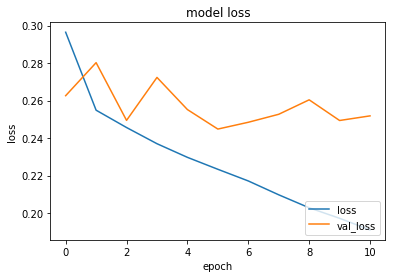

In [31]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

In [68]:
y_pred = model.predict(x_test)
y_pred =(y_pred>0.5)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[120232    227]
 [ 12006   1535]]


In [86]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred  > 0.5, 1, 0)

In [87]:
predictions = pd.DataFrame(y_pred)

In [90]:
sub=pd.concat([test[["ID_code"]], predictions], axis = 1)
sub=sub.rename(columns={0:'target'})

In [91]:
sub.head()

,ID_code,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,0.0
4,test_4,0.0


In [92]:
sub.to_csv('submission.csv', index=False, header=True)